In [ ]:
#### Section for importing the libraries I need ###

In [16]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='cd378cd4-5dcd-4542-87d5-2c2b9b1b307d', project_access_token='p-4f85b284b4aa9b6e1daf9fd1b0a8d9d5795bee63')
pc = project.project_context


In [17]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

In [18]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [19]:
%%capture
! pip install seaborn

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [21]:
from sklearn.linear_model import LinearRegression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
from scipy import stats

In [23]:
#Accessing Foursquare Api as data source for Venues in different cities

CLIENT_ID = 'STW21VBWLIIYZBDHERKEIV1TOT102BIDKIRAYGPVMCG2DL4B' # your Foursquare ID
CLIENT_SECRET = '2OV1QZ5FLHOIP1YLCCUA0IF1QEX1PPEXMED2ULGMD2RMO32V' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: STW21VBWLIIYZBDHERKEIV1TOT102BIDKIRAYGPVMCG2DL4B
CLIENT_SECRET:2OV1QZ5FLHOIP1YLCCUA0IF1QEX1PPEXMED2ULGMD2RMO32V


In [24]:
# CREATING A DATAFRAME WITH THE KEY CITIES OF INTEREST and location
ciudades = {'City':['Buenos Aires','New York','Miami','Barcelona','Madrid','London','Mexico City','Toronto','Sao Paulo'], 'Latitude':[-34.5875,40.7347,25.7617,41.3851,40.4168,51.5074,19.4326,43.6532,-23.5505], 'Longitude':[-58.3934,-74.0048,-80.1918,2.1734,-3.7038,-0.1278,-99.1332,-79.3832,-46.6333]}
df_ciudades=pd.DataFrame(data=ciudades)
df_ciudades

,City,Latitude,Longitude
0,Buenos Aires,-34.5875,-58.3934
1,New York,40.7347,-74.0048
2,Miami,25.7617,-80.1918
3,Barcelona,41.3851,2.1734
4,Madrid,40.4168,-3.7038
5,London,51.5074,-0.1278
6,Mexico City,19.4326,-99.1332
7,Toronto,43.6532,-79.3832
8,Sao Paulo,-23.5505,-46.6333


In [25]:
### OBTAINING INFO FROM FOURSQUARE ###
# Definting parameters to pull Argentinian Restaurants in the selected cities out of Foursquare
LIMIT=1000
categoryId='4bf58dd8d48988d107941735'

In [33]:
# Code to pull data from Foursquare
def getBAvenues(cities, latitudes, longitudes, radius=7000):
    
    venues_list=[]
    for name, lat, lng in zip(cities, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            categoryId,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['id'],
            #v['venue']['price']['tier'],
            #v['venue']['rating'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue ID',
                  #'Venue Price',
                  #'Venue Rating',
                  'Venue Category']
    
    return(nearby_venues)

BA_venues = getBAvenues(cities=df_ciudades['City'],
                                   latitudes=df_ciudades['Latitude'],
                                   longitudes=df_ciudades['Longitude'])

Buenos Aires
New York
Miami
Barcelona
Madrid
London
Mexico City
Toronto
Sao Paulo


In [34]:

BA_venues.head(10)

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue ID,Venue Category
0,Buenos Aires,-34.5875,-58.3934,Roux,-34.590651,-58.397435,538dd83a498eb2165c0011ac,Argentinian Restaurant
1,Buenos Aires,-34.5875,-58.3934,Fervor,-34.587418,-58.387311,4b8f020af964a520244433e3,Argentinian Restaurant
2,Buenos Aires,-34.5875,-58.3934,Melo Restaurant,-34.592362,-58.393183,4d34deec2c76a143d65189c7,Argentinian Restaurant
3,Buenos Aires,-34.5875,-58.3934,La Molinera,-34.595434,-58.398677,5adfbd68d7627e05ba0891cf,Argentinian Restaurant
4,Buenos Aires,-34.5875,-58.3934,El Mirasol de la Recova,-34.590211,-58.381619,4b7857cef964a5200cc72ee3,Argentinian Restaurant
5,Buenos Aires,-34.5875,-58.3934,Aires Criollos,-34.595828,-58.392830,4b084ad8f964a520490823e3,Argentinian Restaurant
6,Buenos Aires,-34.5875,-58.3934,Casa Cavia,-34.577579,-58.407056,548a1ae2498eb43fd4747400,Argentinian Restaurant
7,Buenos Aires,-34.5875,-58.3934,La Aguada,-34.589112,-58.409139,4da9d4a34df01c19b17b446c,Argentinian Restaurant
8,Buenos Aires,-34.5875,-58.3934,La Querencia,-34.592901,-58.397066,4c0c5b377189c928bf79d5b6,Argentinian Restaurant
9,Buenos Aires,-34.5875,-58.3934,Santos Manjares,-34.597867,-58.380387,559ea3bc498ed9c8c46a6035,Argentinian Restaurant


In [59]:
BA_venues.shape

(485, 8)

In [60]:
# Exporting Foursquare report for Argentinian Restaurantes on all 8 cities. 
project.save_data("reportglobalvenues3.csv", BA_venues.to_csv())

{'file_name': 'reportglobalvenues3.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'applieddatasciencecapstone-donotdelete-pr-ddljefcfztnyrw',
 'asset_id': 'e0c30a37-e32b-4f77-9bab-d457c316617a'}

In [30]:
#### IMPORTING OTHER RELEVANT DATA FOR THE 8 CITIES ###

body = client_e330ab166be744be8498f52dd97baed5.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-ddljefcfztnyrw',Key='Global City Data.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_globalcities = pd.read_excel(body)
df_globalcities.head()
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_2 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-69b8a519-e16e-4534-b86c-4bcac9cc3c7d',
    'IBM_API_KEY_ID': 'mmGi-AbHD0PF2MkeCaHKTKI9eF6L3ZZt1ZTvWyOb-r_z',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.ng.bluemix.net/oidc/token',
    'BUCKET': 'applieddatasciencecapstone-donotdelete-pr-ddljefcfztnyrw',
    'FILE': 'Global City Data.xlsx'
}

In [31]:
df_globalcities.head(10)

,World City,Argentinian Residents,Incoming tourists,Total Population,Argentinian Restaurants
0,Toronto,16910,119000,6139000,2
1,New York,15169,171600,8550000,16
2,Mexicy City,14747,172300,21100000,100
3,Sao Paulo,13896,727600,12180000,42
4,Barcelona,13387,98000,5541000,52
5,Madrid,9706,55600,6559000,52
6,London,9296,45000,9180000,29
7,Miami,4891,48800,475000,24


In [ ]:
### START STATISTICAL ANALYSIS ####

In [32]:
# 1) Understand the correlation of the different data points
df_globalcities.corr()

,Argentinian Residents,Incoming tourists,Total Population,Argentinian Restaurants
Argentinian Residents,1.000000,0.343013,0.509721,0.047329
Incoming tourists,0.343013,1.000000,0.365457,0.089358
Total Population,0.509721,0.365457,1.000000,0.722471
Argentinian Restaurants,0.047329,0.089358,0.722471,1.000000


(0, 125.64413388151765)

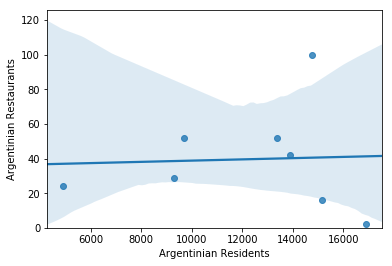

In [23]:
sns.regplot(x='Argentinian Residents', y="Argentinian Restaurants", data=df_globalcities)
plt.ylim(0,)

In [36]:
# 2) Perform a lineal regresion to obtain the regression equation
lm = LinearRegression()
X1 = df_globalcities[['Argentinian Residents']]
Y1 = df_globalcities['Argentinian Restaurants']
lm.fit(X1,Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
lm.intercept_

35.23796325443784

In [38]:
lm.coef_

array([0.00035812])

In [44]:
print('LM1 Intercept=',lm.intercept_,'LM2 Coef =',lm.coef_)

LM1 Intercept= 35.23796325443784 LM2 Coef = [0.00035812]


In [47]:
print('The R-square for 8 Cities is: ', lm.score(X1, Y1))

The R-square for 8 Cities is:  0.002240034198851548


In [45]:
pearson_coef, p_value = stats.pearsonr(df_globalcities['Argentinian Residents'], df_globalcities['Argentinian Restaurants'])
print("The Pearson Correlation for 8 Cities Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation for 8 Cities Coefficient is 0.04732899955472767  with a P-value of P = 0.9113905599999204


In [ ]:
# Now I will do the same analysis but without including New York and Toronto

In [27]:
# Importing the 6 city relevant data

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_3 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-69b8a519-e16e-4534-b86c-4bcac9cc3c7d',
    'IBM_API_KEY_ID': 'mmGi-AbHD0PF2MkeCaHKTKI9eF6L3ZZt1ZTvWyOb-r_z',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.ng.bluemix.net/oidc/token',
    'BUCKET': 'applieddatasciencecapstone-donotdelete-pr-ddljefcfztnyrw',
    'FILE': 'Global City Data 2.xlsx'
}
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e330ab166be744be8498f52dd97baed5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='mmGi-AbHD0PF2MkeCaHKTKI9eF6L3ZZt1ZTvWyOb-r_z',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e330ab166be744be8498f52dd97baed5.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-ddljefcfztnyrw',Key='Global City Data 2.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_globalcities2 = pd.read_excel(body)
df_globalcities2.head(10)


,World City,Argentinian Residents,Incoming tourists,Total Population,Argentinian Restaurants
0,Mexicy City,14747,172300,21100000,100
1,Sao Paulo,13896,727600,12180000,42
2,Barcelona,13387,98000,5541000,52
3,Madrid,9706,55600,6559000,52
4,London,9296,45000,9180000,29
5,Miami,4891,48800,475000,24


In [28]:
# Perform correlation analysis => the correlation to both argentinian residents and total population is much higher
df_globalcities2.corr()

,Argentinian Residents,Incoming tourists,Total Population,Argentinian Restaurants
Argentinian Residents,1.000000,0.511089,0.769824,0.710255
Incoming tourists,0.511089,1.000000,0.353461,0.029736
Total Population,0.769824,0.353461,1.000000,0.823270
Argentinian Restaurants,0.710255,0.029736,0.823270,1.000000


(0, 112.86996909496402)

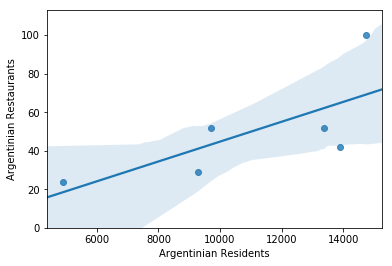

In [29]:
sns.regplot(x="Argentinian Residents", y="Argentinian Restaurants", data=df_globalcities2)
plt.ylim(0,)

In [34]:
pearson_coef, p_value = stats.pearsonr(df_globalcities2['Argentinian Residents'], df_globalcities2['Argentinian Restaurants'])
print("The Pearson Correlation for 6 Cities Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation for 6 Cities Coefficient is 0.7102554536600942  with a P-value of P = 0.11376555030152359


In [39]:
lm2 = LinearRegression()
X2 = df_globalcities2[['Argentinian Residents']]
Y2 = df_globalcities2['Argentinian Restaurants']
lm2.fit(X2,Y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
print('LM2 Intercept=',lm2.intercept_,'LM2 Coef =',lm2.coef_)

LM2 Intercept= -6.807414791343476 LM2 Coef = [0.00515517]


In [46]:
print('The R-square for 6 Cities is: ', lm2.score(X2, Y2))

The R-square for 6 Cities is:  0.5044628094539062


In [49]:
df_details=df_globalcities.drop(['Total Population'], axis=1)
df_details=df_details.drop(['Incoming tourists'], axis=1)

In [50]:
df_details

,World City,Argentinian Residents,Argentinian Restaurants
0,Toronto,16910,2
1,New York,15169,16
2,Mexicy City,14747,100
3,Sao Paulo,13896,42
4,Barcelona,13387,52
5,Madrid,9706,52
6,London,9296,29
7,Miami,4891,24


Text(0.5, 1.0, 'Relevant data by city')

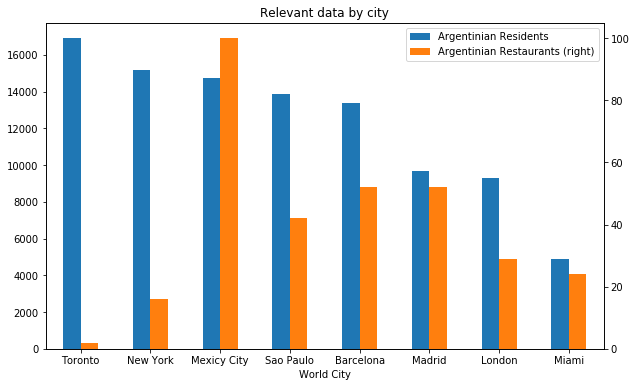

In [70]:
#ax = df_details.plot.bar(,y="Argentinian Residents", figsize=(10, 6), rot=0)
df_details.plot.bar(x='World City', secondary_y=['Argentinian Restaurants'],figsize=(10, 6), rot=0)
plt.xlabel('World City')
plt.title('Relevant data by city')


In [2]:
#Obtaining Steakhouse data
SteakhouseId='4bf58dd8d48988d1cc941735'

In [15]:
def getBAvenues(cities, latitudes, longitudes, radius=7000):
    
    venues_list=[]
    for name, lat, lng in zip(cities, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            SteakhouseId,
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['id'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues_steak = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues_steak.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue ID',
                  'Venue Category']
    
    return(nearby_venues_steak)

BA_venues = getBAvenues(cities=df_ciudades['City'],
                                   latitudes=df_ciudades['Latitude'],
                                   longitudes=df_ciudades['Longitude'])

Buenos Aires
New York
Miami
Barcelona
Madrid
London
Mexico City
Toronto
Sao Paulo


In [17]:
BA_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue ID,Venue Category
0,Buenos Aires,-34.5875,-58.3934,Fervor,-34.587418,-58.387311,4b8f020af964a520244433e3,Steakhouse
1,Buenos Aires,-34.5875,-58.3934,Parrilla Don Julio,-34.586308,-58.424390,4b623804f964a520e03c2ae3,Steakhouse
2,Buenos Aires,-34.5875,-58.3934,Piegari Ristorante,-34.589929,-58.382213,4b05871bf964a520308022e3,Steakhouse
3,Buenos Aires,-34.5875,-58.3934,Nuestro Secreto,-34.590960,-58.382336,524ed290498eec5cd2561ec7,Steakhouse
4,Buenos Aires,-34.5875,-58.3934,Aires Criollos,-34.595828,-58.392830,4b084ad8f964a520490823e3,Steakhouse


In [18]:
project.save_data("steakhouses.csv", BA_venues.to_csv())

{'file_name': 'steakhouses.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'applieddatasciencecapstone-donotdelete-pr-ddljefcfztnyrw',
 'asset_id': 'd3c848bd-7253-45c8-a667-7f59cb099575'}

In [20]:
BA_venues.shape

(616, 8)

In [ ]:
# Start Model Testing DAta

In [53]:
df_details

,World City,Argentinian Residents,Argentinian Restaurants
0,Toronto,16910,2
1,New York,15169,16
2,Mexicy City,14747,100
3,Sao Paulo,13896,42
4,Barcelona,13387,52
5,Madrid,9706,52
6,London,9296,29
7,Miami,4891,24


In [60]:
df_details2=df_details.drop([0], axis=0)
df_details2=df_details2.drop([1], axis=0)
df_details2

,World City,Argentinian Residents,Argentinian Restaurants
2,Mexicy City,14747,100
3,Sao Paulo,13896,42
4,Barcelona,13387,52
5,Madrid,9706,52
6,London,9296,29
7,Miami,4891,24


In [62]:
from sklearn.model_selection import train_test_split

y_data = df_details2['Argentinian Restaurants']
x_data=df_details2.drop('Argentinian Restaurants',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.50, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 3
number of training samples: 3
